In [26]:
import numpy as np
import pandas as pd
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [8]:
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(13, input_dim=2, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

In [9]:
seed = 7
numpy.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)

In [10]:
import sklearn.datasets as datasets
X,y=datasets.make_regression(n_samples=100,n_features=2,noise=7)

In [11]:
numpy.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X, y, cv=kfold)
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Instructions for updating:
Use tf.cast instead.
Standardized: -2812.69 (1396.13) MSE


In [17]:

# example of training a final regression model
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=2, noise=0.1, random_state=1)
# define and fit the final model
model = Sequential()
model.add(Dense(10, input_dim=2, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam')
model.fit(X, y, epochs=1000, verbose=0)

In [18]:
y_pred=model.predict(X)

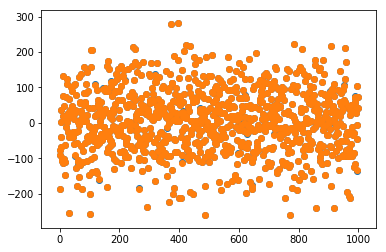

In [21]:

plt.scatter(range(len(y)),y)
plt.scatter(range(len(y)),y_pred)
plt.show()

In [71]:
max_velocity=200
max_density = 3000
max_length=5
max_viscosity=1

def funci(no_elements=10000):
    velocity = np.random.uniform(0,max_velocity,no_elements)
    density = np.random.uniform(1,max_density,no_elements)
    df=pd.DataFrame({"velocity":velocity,"density":density})

    fluid=df.velocity*df.density
    df["fluid_type"]=fluid
    return(df)

In [72]:
funci(5)

,velocity,density,fluid_type
0,24.575720,2300.886639,56545.946021
1,46.769330,6.559247,306.771580
2,53.305346,1705.245440,90898.698969
3,23.962422,2177.972234,52189.488771
4,158.612341,1638.690897,259916.598615


In [83]:
df = funci(5000)
np_df=df.values
y_actual = np_df[:,2]

In [74]:
df

,velocity,density,fluid_type
0,122.727216,810.066567,99417.214512
1,175.834259,1310.446667,230421.418045
2,180.238334,129.423870,23327.142773
3,47.406815,2440.930840,115716.755785
4,191.277685,437.984718,83776.703134
5,14.625179,91.141324,1332.958191
6,115.795997,1644.102343,190380.470229
7,110.170569,2858.745645,314949.633126
8,110.402513,1885.851597,208202.754788
9,8.495146,2499.268852,21231.652813


In [84]:
X,y = np_df[:,:2],np_df[:,2]
model = Sequential()
model.add(Dense(10, input_dim=2, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam')
model.fit(X, y, epochs=1000, verbose=0)

In [85]:
y_pred=model.predict(X)

(0, 100000)

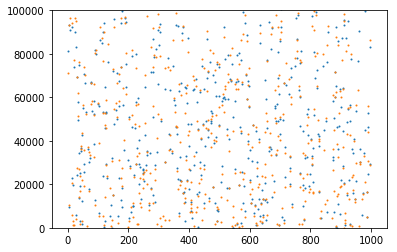

In [88]:
plt.scatter(range(1000),y_pred[:1000],s=1)
plt.scatter(range(1000),y[:1000],s=1)
plt.ylim(0,100000)

In [50]:
np_df[0]

array([6.81230149e-01, 2.12461663e+03, 4.98272823e+00, 6.74337101e-01,
       1.44735290e+03])

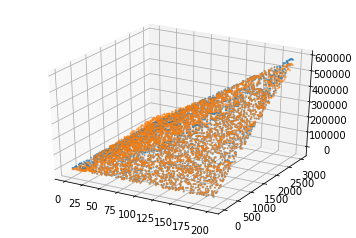

In [86]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
#ax.plot3D(X.T[0], X.T[1], y, 'gray')
ax.scatter3D(X.T[0], X.T[1], y, s=1,alpha=0.5,cmap='Greens')
ax.scatter3D(X.T[0], X.T[1], y_pred, s=1,alpha=0.5,cmap='Greens')
#plt.scatter(X.T[0],X.T[1],y)

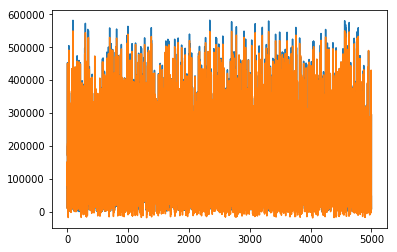

In [87]:
plt.plot(y)
plt.plot(y_pred)

In [99]:
model.predict(X[:2])

array([[150056.62],
       [ 81121.67]], dtype=float32)

In [101]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = self.hidden(x)      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x
    
    


array([[  89.20340405, 1673.23580843],
       [  72.32529241,  985.95688579],
       [ 105.86186809, 1277.91881767],
       ...,
       [  20.09866229, 2382.24516807],
       [  40.94985919,  164.69587426],
       [ 175.24297682, 1676.10691373]])